# Quantum Teleportation

*Written by Guido Putignano*

Quantum teleportation is the transfer of quantum states from one qubit to one another. It's not about transferring the information physically, but it's focused on transferring the information state.

## Overview

Imagine if there is a physicist, Alice wants to send quantum information to Bob, a researcher in Quantum Biology. Specifically, suppose she wants to send the qubit state |ψ⟩= α|0⟩+β|1⟩. One general idea is to pass the information of α and β to Bob. According to the No-cloning theorem, you can't do so.  
However, by taking advantage of two classical bits and an entangled qubit pair, Alice can transfer her state |ψ⟩ to Bob. We call this teleportation because, in the end, Bob will have |ψ⟩ and Alice won't anymore.

## Process

**Part 1:** Alice and Bob need to begin by sharing a special two-qubit state to start the teleportation. That qubit state is (​∣00⟩+∣11⟩​)/√2
Currently, we have 3 qubits, and we want to send 1 qubit.   
**Part 2:** Alice creates Bell pair on her qubits, followed by measuring both of her qubits on the computational basis, with outcomes z and x. These are just conventional classical bits, each taking the value 0 or 1. In quantum circuit language, the way to create a Bell pair between two qubits is first to transfer one of them to the X-basis (|+⟩ and |−⟩ using a Hadamard gate, and then to apply a CNOT gate onto the other qubit controlled by the one in the X-basis.  
**Part 3:** Alice then sends the classical bits z and x to Bob. Sending bits is far easier than sending qubits. Indeed, it can happen on the internet, with a mail Pigeon or any other means. In any case, the information won’t be faster than light because Alice has to send 2 classical bits. In other words, Quantum Teleportation can’t be faster than light.  
**Part 4:** Bob received those qubits.
* If x=1, Bob then applies the Pauli X gate (i.e., the quantum NOT gate) to his qubit
* If z = 1, Bob then applies the Pauli Z gate (i.e., the quantum NOT gate) to his qubit
* If x = 0 or z = 0, Bob can drink a soda.
##### Bob’s qubit is now in the same state |ψ⟩ that Alice started with.

In [1]:
from qiskit import *

In [11]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = this is the state |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation (that's the state that will be edited)

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport to Bob

circuit.barrier() # this can be a visual aid when we identify the circuit

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively. 
# that part can make us send the bits to Bob. We can do that in any way

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
#that would be extremely easy to apply
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])

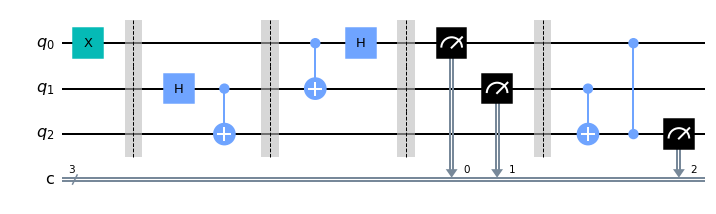

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

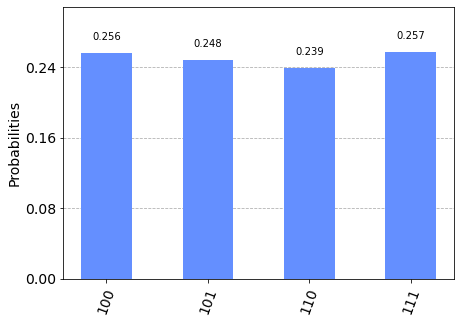

In [12]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))
# We have 4 possibilities with (almost) the same percentages. The only difference is due to small mistakes
# during the computation

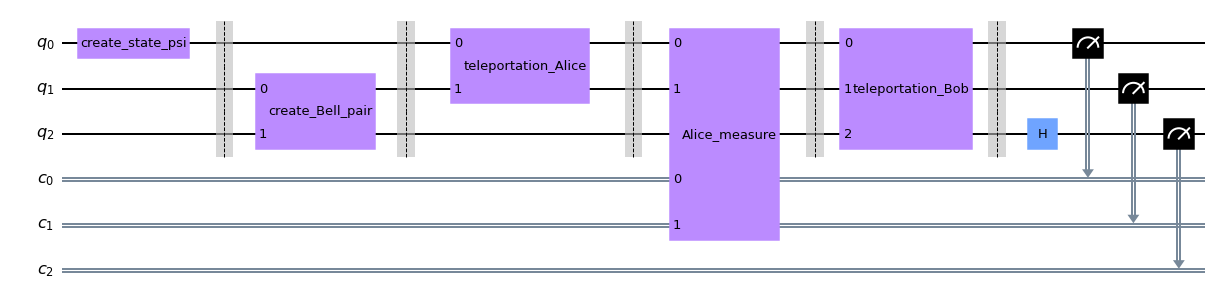

In [9]:
def create_state_psi(theta):
    # Create a state along the x axis on the x-y plane and then rotate it by angle theta around the z-axis
    # theta = 0 => state is exactly along x
    # theta = pi/2 => state is exactly along y
    create_circuit = QuantumCircuit(1, name='create_state_psi')
    create_circuit.h(0)
    create_circuit.rz(theta, 0)
    return create_circuit

def create_Bell_pair():
    create_Bell_circuit = QuantumCircuit(2, name='create_Bell_pair')
    create_Bell_circuit.h(0)
    create_Bell_circuit.cx(0,1)
    return create_Bell_circuit

def teleportation_Alice():
    teleportation_Alice_circuit = QuantumCircuit(2, name='teleportation_Alice')
    teleportation_Alice_circuit.cx(0,1)
    teleportation_Alice_circuit.h(0)
    return teleportation_Alice_circuit

def Alice_measure():
    Alice_measure_circuit = QuantumCircuit(2, 2, name='Alice_measure')
    Alice_measure_circuit.measure([0,1], [0,1])
    return Alice_measure_circuit

def teleportation_Bob():
    teleportation_Bob_circuit = QuantumCircuit(3, name='teleportation_Bob')
    teleportation_Bob_circuit.cx(1,2)
    teleportation_Bob_circuit.cz(0,2)
    return teleportation_Bob_circuit

def build_circuit(theta):
    circuit = QuantumCircuit(3, 3)
    # Step 0: create the state to teleport
    circuit.append(create_state_psi(theta).to_instruction(), [0])
    circuit.barrier()
    # Step 1: create the Bell pair between Alice and Bob's qubits
    circuit.append(create_Bell_pair().to_instruction(), [1,2])
    circuit.barrier()
    # Step 2: Alice applies a series of operations
    circuit.append(teleportation_Alice().to_instruction(), [0,1])
    circuit.barrier()
    # Step 3: Alice measures her two qubits
    circuit.append(Alice_measure().to_instruction(), [0,1], [0,1])
    circuit.barrier()
    # Step 4: Bob applies operations to his qubit depending on Alice's measurement outcomes
    circuit.append(teleportation_Bob().to_instruction(), [0,1,2])
    circuit.barrier()
    # Step 5: Done. Now measure Bob's qubit to be sure that teleportation was successful
    circuit.h(2) # note that the Hadamard gate here ensures that we measure in the Hadamard basis instead of z basis
    circuit.measure([0,1,2], [0,1,2])
    return circuit

circuit = build_circuit(0.01)
circuit.draw(output='mpl')

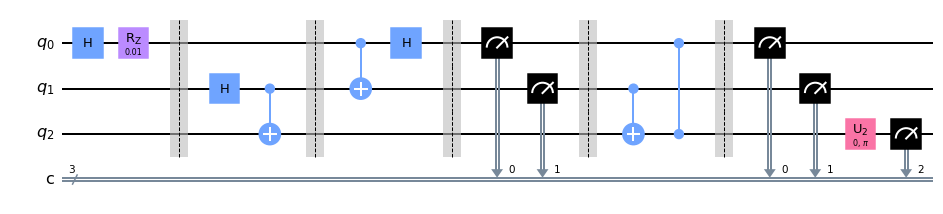

In [6]:
circuit.decompose().draw(output='mpl')

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
print(counts)
num_c2_zero = sum(counts[c2c1c0] for c2c1c0 in counts if c2c1c0[0] == '0')

{'011': 250, '000': 280, '010': 250, '001': 244}


## References

* [Quantum Country](https://quantum.country/teleportation)
* [Qiskit](https://qiskit.org/textbook/ch-algorithms/teleportation.html)
* [Qiskit's Youtube Tutorial](https://www.youtube.com/watch?v=mMwovHK2NrE&ab_channel=Qiskit)
* [Medium Article](https://medium.com/yealthy/how-does-quantum-teleportation-work-214623f94969)